# Data III


## Probleemstelling

Netflix maakt regelmatig beslissingen over de toekomst van series en films. Een productie kan soms meerdere seizoenen of vervolgfilms in de planning hebben staan, maar toch worden die dan geannuleerd. Dan kan de vraag ontstaan of het annuleren wel de juiste keuze was. 

Het annuleren van een vervolg op een film of serie wordt negatief ervaren door fans en kan de reputatie van Netflix verminderen, wat kan leiden tot minder abonnees en lagere kijkcijfers doordat niemand aan nieuwe shows of films begint.

Door middel van een onderzoek naar kijkcijfers, reviews en ratings van de eerdere delen, en reacties van het publiek wil Netflix erachter komen of het annuleren de juiste beslissing was. De taak van het machine learning team is om de reviews om te werken naar sentimenten om deze te kunnen gebruiken in een machine learning model. En een dashboard te maken waarmee de statistieken van een extra seizoen voorspeld kunnen worden.

#### Zakelijk inzicht  
Met behulp van dit onderzoek kan er worden gekeken naar de mogelijke performance van een volgend seizoen of vervolgfilm. Dit kan Netflix ondersteunen met onderbouwde keuzes maken, richting het annuleren van vervolgen om fans en abonnees tevreden te houden. Door te kijken naar de sentimenten, ratings en kijkcijfers kunnen zowel de bedrijfswinst en reputatie bij abonnees worden gewaarborgd. 

#### Literatuur onderzoek
Het onderzoek richt zich op sentiment analyse met behulp van Natural Language Processing (NLP), hiermee kunnen reviews van rotten tomatoes worden omgezet naar sentimenten. Na onderzoek is geen soort gelijk project waarmee het onderzoek vergeleken kan worden. 

Netflix is een online streaming service, via deze service kan eigen media en ook overgekochte media worden gestreamd. In het geval van dit Onderzoek zal het over de eigen media gaan, de Netflix Orginals. De Netflix Originals worden gemaakt door de Netflix studios, bij hen ligt dus ook de keuzes om deze te annuleren of vervolgen. 

#### vereisten informatie
- Een database met informatie en details van films en series van Netflix media.
- De belangrijke details zijn onder andere aantal seizoenen, aantal kijkers, release jaar, ratings, genre, regisseur, cast.
- De ratings moeten bruikbaar zijn bij machine learning.
- De tweets moeten omgezet worden naar een formaat dat bruikbaar is zodat een machine learning model er op kan trainen.
- De Rotten tomatoes website moet kunnen worden gescrapped 
- De API moet gebonden worden aan titels in de dataset

#### Databronnen
- Netflix series and movies Dataset: Netflix movies and TV shows. (2021, September 27). https://www.kaggle.com/datasets/shivamb/netflix-shows/data
- Rotten tomatoes: Rotten Tomatoes: movies | TV shows | Movie trailers | reviews. (n.d.). Rotten Tomatoes. https://www.rottentomatoes.com/
- API TMDB Movie database: Getting started. (n.d.). The Movie Database (TMDB). https://developer.themoviedb.org/reference/intro/getting-started

#### Data verwerken
- Dataset inladen naar DataFrame en klaar maken voor machine learning. Het verwijderen van de descriptions van de show/film en kolommen omzetten naar nummeriek bij bijvoorbeeld age rating een schaal van 1-5 maken.
- De rotten tomatoes site wordt gescrapped voor reviews en ratings per show/film. Bij shows wordt ook gekeken naar het meest recente seizoen
- Van TMDB wordt de data verzameld door middel van de API's

#### Soort data
- Dataset, gestructureerd: Er wordt gewerkt met een csv bestand waar elke rij een andere film/show betekent. 
- De rotten tomatoes, semi gestructureerd: De reviews kunnen worden gezien als ongestructureerd en de ratings als gestructureerd. Hierbij, dus de hele bron als semi gestructureerde data.
- TMDB, semi gestructureerd: De informatie wordt behaald door API's te gebruiken. Deze API's worden aangeboden in een gestandaardiseerde vorm. Toch, wordt er voor Semi gestructureerd gekozen vanwege de gestructureerde en ongestructureerde variabele van dit format.

## Data extraheren

### Database netflix films en series

In [1]:
pip install pandas sqlite3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [2]:
# importeren van de benodigde libraries
import pandas as pd
import sqlite3
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import logging
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniëlla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniëlla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniëlla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Daniëlla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Daniëlla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
netflix_k = pd.read_csv('netflix_titles.csv')
netflix_k = netflix_k.head(1000)
netflix_k
print(netflix_k['type'].value_counts())
display(netflix_k.head(10))


Movie      655
TV Show    345
Name: type, dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
def clean_titles(title):
    # Vervang speciale tekens
    title = title.replace("&", "and").replace(":", "")
    # Zet om naar kleine letters en vervang spaties door underscores
    title = title.lower().replace(" ", "_")
    return title


In [5]:

def get_url(row):
    clean_title = clean_titles(row['title'])
    
    if row['type'] == 'Movie':
        return f"m/{clean_title}"
    elif row['type'] == 'TV Show':
         if "Season" in row["duration"]:  
                season_number = int(row["duration"].split(" ")[0]) 
                season_formatted = f"/s{season_number:02}" 
                return f"/tv/{clean_title}{season_formatted}"


In [6]:
netflix_k['title'] = netflix_k['title'].apply(clean_titles)
netflix_k['url'] = netflix_k.apply(get_url, axis=1)

In [7]:
netflix_k

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,url
0,s1,Movie,dick_johnson_is_dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",m/dick_johnson_is_dead
1,s2,TV Show,blood_and_water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",/tv/blood_and_water/s02
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,/tv/ganglands/s01
3,s4,TV Show,jailbirds_new_orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",/tv/jailbirds_new_orleans/s01
4,s5,TV Show,kota_factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,/tv/kota_factory/s02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,s996,Movie,vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"April 23, 2021",2001,TV-MA,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir...",m/vizontele
996,s997,Movie,homunculus,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...,m/homunculus
997,s998,TV Show,life_in_color_with_david_attenborough,NaN,David Attenborough,"Australia, United Kingdom","April 22, 2021",2021,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...","Using innovative technology, this docuseries e...",/tv/life_in_color_with_david_attenborough/s01
998,s999,Movie,searching_for_sheela,NaN,Ma Anand Sheela,India,"April 22, 2021",2021,TV-14,58 min,"Documentaries, International Movies",Journalists and fans await Ma Anand Sheela as ...,m/searching_for_sheela


### Webscrapen van rotten tomatoes

In [8]:
logging.basicConfig(format='%(levelname)s: %(message)s', level=logging.DEBUG)

all_reviews = {}
# Loop through each title to scrape reviews
for title in netflix_k['url']:
    url = f"https://www.rottentomatoes.com/{title}/reviews?type=user"  # Update URL format as needed
    logging.info(f"Scraping reviews for '{title}' from {url}")
    
    try:
        response = requests.get(url)
        time.sleep(0.5)  # Add a delay to prevent overwhelming the server

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Find all review paragraphs with the specified class
            reviews = soup.find_all('p', class_='audience-reviews__review js-review-text')
            stars = soup.find_all('rating-stars-group')  # Find all star ratings
            
            # Store the reviews and ratings in lists
            title_reviews = []
            title_ratings = []
            
            # Get up to 3 reviews and corresponding stars
            for index, review in enumerate(reviews[:3], start=1):  # Limit to 3 reviews
                title_reviews.append(review.get_text(strip=True))
                
                # Get the star rating for the review
                if index - 1 < len(stars):
                    star_score = stars[index - 1].get('score', 'N/A')  # Get 'score' attribute
                    title_ratings.append(float(star_score))
                else:
                    title_ratings.append("N/A")  # No stars available

            # Store in the main dictionary
            all_reviews[title] = {
                "reviews": title_reviews,
                "ratings": title_ratings,
            }
            logging.info(f"Successfully scraped reviews for '{title}'")
        else:
            logging.error(f"Failed to load the page for '{title}'")
            all_reviews[title] = {
                "reviews": ["Error: Failed to load the page."],
                "ratings": [],
            }
    except Exception as e:
        logging.error(f"An error occurred for '{title}': {str(e)}")
        all_reviews[title] = {
            "reviews": ["Error: An exception occurred."],
            "ratings": [],
        }

# Output the reviews and ratings
for title, data in all_reviews.items():
    print(f"\nReviews for '{title}':")
    for i, (review, rating) in enumerate(zip(data["reviews"], data["ratings"]), start=1):
        print(f"Review {i}: {review}")
        print(f"Rating: {rating}\n" + ("-" * 40))



#https://chatgpt.com/share/677d2ba4-37ec-8010-bd07-9c8aacb3b740 
# duur = 9 minuten 14 seconden zonder aanpassingen
# duur = 42 minuten 56 seconden met aanpassingen (sleep(2) en logging)
# duur = 18 minuten 35 seconden met aanpassingen (sleep(0.5) en logging) 
# Met selenium krijg je en geen sterren en duurt het 66 min

INFO: Scraping reviews for 'm/dick_johnson_is_dead' from https://www.rottentomatoes.com/m/dick_johnson_is_dead/reviews?type=user
DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:443 "GET /m/dick_johnson_is_dead/reviews?type=user HTTP/1.1" 200 40832
INFO: Successfully scraped reviews for 'm/dick_johnson_is_dead'
INFO: Scraping reviews for '/tv/blood_and_water/s02' from https://www.rottentomatoes.com//tv/blood_and_water/s02/reviews?type=user
DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:443 "GET //tv/blood_and_water/s02/reviews?type=user HTTP/1.1" 200 25731
INFO: Successfully scraped reviews for '/tv/blood_and_water/s02'
INFO: Scraping reviews for '/tv/ganglands/s01' from https://www.rottentomatoes.com//tv/ganglands/s01/reviews?type=user
DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:443 "GET //tv/ganglands/s01/


Reviews for 'm/dick_johnson_is_dead':
Review 1: This is a documentary that will hit many different people in many different ways depending on their past and present life experiences. Without getting too personal, in some ways I am living out a bit of what is happening in this movie and found parallels that are eerily accurate, including a need to help figure out the TV that happened just a few hours earlier today. As a result, this was a rather extraordinary experience for me. I'll be honest - when I first read the description of this movie, it sounded a bit off kilter, and I think it could have gone terribly wrong in numerous ways. But director/daughter Johnson is a smart cookie and finds a beautiful balance between the pain and the humor. While I expected to be moved - and I most certainly was - I was surprised by how often I smiled and laughed throughout. And it helps that Dick Johnson is just the loveliest man ever, a kind and gentle soul whose smile lights up a room and whose spi

## Uitleg over het web scrapen:
Dit script verzamelt gebruikersbeoordelingen en sterrenbeoordelingen van films of series op **Rotten Tomatoes**. Het maakt gebruik van de `requests`-bibliotheek om webpagina's op te halen, `BeautifulSoup` om de HTML van de pagina te parseren, en `logging` om meldingen en fouten te loggen.

## Stappen van het Script

1. **Logging Configuratie:**    
   Het script configureert logging om meldingen van het type **DEBUG** of hoger weer te geven. Dit helpt bij het volgen van de voortgang en het opsporen van fouten:      

   ```python
   logging.basicConfig(format='%(levelname)s: %(message)s', level=logging.DEBUG)
2. **Dictionary voor reviews:** 
    De variabele all_reviews is een lege dictionary die de beoordelingen en sterrenbeoordelingen van elke titel opslaat:    
    all_reviews = {}
3. **Loop door de titels:** 
    Het script doorloopt de lijst van URL's van films/series die moeten worden gescrapet. Elke URL vertegenwoordigt een specifieke titel:   
    for title in netflix_k['url']:
4. **Opbouw van de URl en Logging:**    
    De URL voor elke titel wordt opgebouwd en een log bericht wordt gegenereerd om aan te geven dat het script de beoordelingen van die specifieke titel aan het scrapen is:    
    url = f"https://www.rottentomatoes.com/{title}/reviews?type=user"   
    logging.info(f"Scraping reviews for '{title}' from {url}")
5. **Verzoek naar de pagina:**  
    Een GET-verzoek wordt gedaan naar de URL en er wordt een vertraging van 0.5 seconden toegevoegd om de server niet te overbelasten:  
    response = requests.get(url)
    time.sleep(0.5)
6. **Controle op de status van het verzoek:**   
    Het script controleert of de statuscode van de pagina 200 is, wat betekent dat de pagina succesvol is geladen:  
    if response.status_code == 200:
7. **HTML parseren met BeautifulSoup:** 
    De HTML van de pagina wordt geparsed met BeautifulSoup om de relevante informatie (beoordelingen en sterren) eruit te extraheren:   
    soup = BeautifulSoup(response.content, 'html.parser')
8. **Beoordelingen en sterren extraheren:** 
    De tekst van de recensies wordt opgehaald via de p-tags met de class 'audience-reviews__review js-review-text'. De sterrenbeoordelingen worden opgehaald uit de 'rating-stars-group'-tags:      
    reviews = soup.find_all('p', class_='audience-reviews__review js-review-text')  
    stars = soup.find_all('rating-stars-group')
9. **Beoordelingen en sterren opslaan:**    
    Het script haalt maximaal 3 beoordelingen per titel op, evenals de bijbehorende sterrenbeoordelingen. Als er geen sterinformatie is, wordt "N/A" toegevoegd:    
    for index, review in enumerate(reviews[:3], start=1):   
    title_reviews.append(review.get_text(strip=True))   
    if index - 1 < len(stars):  
        star_score = stars[index - 1].get('score', 'N/A')   
        title_ratings.append(float(star_score)) 
    else:   
        title_ratings.append("N/A") 
10. **Opslaan in de 'all_reviews' dictionary:** 
    De verzamelde beoordelingen en sterren worden opgeslagen in de all_reviews dictionary:  
    all_reviews[title] = {      
    "reviews": title_reviews,   
    "ratings": title_ratings,}  
11. **Fouthandeling:**  
    Als er een fout optreedt tijdens het scrapen, wordt deze geregistreerd in de log en wordt een foutmelding opgeslagen in de reviews en ratings voor die titel:   
    except Exception as e:  
    logging.error(f"An error occurred for '{title}': {str(e)}") 
    all_reviews[title] = {  
        "reviews": ["Error: An exception occurred."],   
        "ratings": [],  
    }
12. **Weergave van de verzamelde gegevens:**    
    Na het scrapen worden de beoordelingen en sterren voor elke titel afgedrukt:    
    for title, data in all_reviews.items(): 
    print(f"\nReviews for '{title}':")  
    for i, (review, rating) in enumerate(zip(data["reviews"], data["ratings"]), start=1):   
        print(f"Review {i}: {review}")      
        print(f"Rating: {rating}\n" + ("-" * 40))   


## Wat er gebeurd
Deze code haalt de gebruikersbeoordelingen en sterrenbeoordelingen van films en series op via de site van **Rotten Tomatoes**. Hiervoor word er gebruikgemaakt van de `request` library om webpagina's op te galen, en `BeautifulSoup` om de HTML van de website te analyseren. Om de fouten en voortgang van de code bij te houden, is er gebruikgemaakt van logging.

Allereerst word er van te voren een lijst gemaakt met de titels van de films en series, in een specifiek formaat dat in de url van een website past. Omdat Rotten Tomatoes een verschillende URL structuur heeft voor films en series, worden de titels in de lijst hierop aangepast. Voor films wordt de URL aangepast met `/m`, en voor series met `/tv`.

Wanneer de URL correct is opgebouwd, word de lijst in de for-loop gezet en wordt er een GET-verzoek gestuurd naar de pagina met de reviews. Er is een vertraging van 0.5 seconden ingebouwd tussen de verzoeken, om te voorkomen dat de server overbelast raakt. Als de pagina word geladen controleert het script of de statuscode 200 is. Hierna word de HTML van de pagina geparsed met `BeautifulSoup`.

De beoordelingen worden verzameld uit de `<p>` tag m.et de class `audience-reviews__review js-review-text`. De sterren worden uit de `rating-stars-group` tag gehaald. Om de belasting van de server te verminderen, en de draai tijd van de code te verminderen, worden er max drie reviews per titel opgehaald. Als er geen sterrenbeoordeling beschikbaar is, word er 'N/A' ingevuld.

De code houdt rekening met eventuele foutmeldingen. Wanneer een film of serie niet op Rotten Tomatoes staat, of als er geen beoordelingen beschikbaar zijn, wordt dit gelogd. Zo is het makkelijker te achterhalen waar iets misgaat en kan er gecontroleerd worden of de fout in de code of de website ligt.

Tot slot worden de reviews en sterren overzichtelijk geprint. Dit maakt het makkelijk om de resultaten te analyseren, en eventuele fouten sneller op te kunnen lossen. Daarnaast geeft het snel een goede indruk of de code werkt.

## Sentiment analyse Reviews

In [9]:
# Step 1: Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Step 2: Remove stop words
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Step 3: Lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Step 4: Sentiment analysis
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment = sentiment_scores['compound']
    return sentiment

# Step 5: Preprocessing pipeline
def preprocess_text(text):
    tokens = tokenize_text(text)
    filtered_tokens = remove_stop_words(tokens)
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Example usage
corpus1 = ["I love this show.",
           "i love this movie, but i hate this one character.",
           "i hate this character but love this season more than the last one."]

corpus2 = ["This is the worst movie i have ever watched.",
           "This sucks.",
           "Everything about this movie sucks except the main character."]

preprocessed_corpus1 = [preprocess_text(text) for text in corpus1]
preprocessed_corpus2 = [preprocess_text(text) for text in corpus2]

# Tussenstappen printen
print("Tussenstappen:")
print("Original text:", corpus1[0])
tokens = tokenize_text(corpus1[0])
print("Tokens:", tokens)
filtered_tokens = remove_stop_words(tokens)
print("Tokens after removing stop words:", filtered_tokens)
lemmatized_tokens = lemmatize_tokens(filtered_tokens)
print("Tokens after lemmatization:", lemmatized_tokens)
preprocessed_text = preprocess_text(corpus1[0])
print("Preprocessed text:", preprocessed_text)
print()

# Analyze sentiment for corpus 1
print("Sentiment analysis for Corpus 1:")
for text in preprocessed_corpus1:
    sentiment = analyze_sentiment(text)
    if sentiment >= 0.05:
        print(f"Positive sentiment: {text}")
    elif sentiment <= -0.05:
        print(f"Negative sentiment: {text}")
    else:
        print(f"Neutral sentiment: {text}")

# Analyze sentiment for corpus 2
print("\nSentiment analysis for Corpus 2:")
for text in preprocessed_corpus2:
    sentiment = analyze_sentiment(text)
    if sentiment >= 0.05:
        print(f"Positive sentiment: {text}")
    elif sentiment <= -0.05:
        print(f"Negative sentiment: {text}")
    else:
        print(f"Neutral sentiment: {text}")

#Bron: week 5 notebook: Text preprocessing met NLTK

Tussenstappen:
Original text: I love this show.
Tokens: ['I', 'love', 'this', 'show', '.']
Tokens after removing stop words: ['love', 'show', '.']
Tokens after lemmatization: ['love', 'show', '.']
Preprocessed text: love show .

Sentiment analysis for Corpus 1:
Positive sentiment: love show .
Positive sentiment: love movie , hate one character .
Positive sentiment: hate character love season last one .

Sentiment analysis for Corpus 2:
Negative sentiment: worst movie ever watched .
Negative sentiment: suck .
Negative sentiment: Everything movie suck except main character .


In [10]:
def average_sentiment(corpus):
    sentiments = [analyze_sentiment(text) for text in corpus]
    average_sentiment = sum(sentiments) / len(sentiments)
    if average_sentiment >= 0.05:
        average_sentiment = "Positive sentiment"
    elif average_sentiment <= -0.05:
        average_sentiment = "Negative sentiment"
    else:    
        average_sentiment = "Neutral sentiment"
    return average_sentiment



# average sentiment corpus 1
average_sentiment1 = average_sentiment(preprocessed_corpus1)
print("Average sentiment for Corpus 1:", average_sentiment1)

# average sentiment corpus 2
average_sentiment2 = average_sentiment(preprocessed_corpus2)
print("Average sentiment for Corpus 2:", average_sentiment2)

#meerdere corpus average sentiment plus toevoegen average sentiment aan een dataframe
corpus = [preprocessed_corpus1, preprocessed_corpus2]
average_sentiments = [average_sentiment(text) for text in corpus]
print(average_sentiments)

df = pd.DataFrame({'corpus': corpus, 'average_sentiment': average_sentiments})
df

df.index = ['corpus1', 'corpus2']
df

#Bron: week 5 notebook: Text preprocessing met NLTK

Average sentiment for Corpus 1: Positive sentiment
Average sentiment for Corpus 2: Negative sentiment
['Positive sentiment', 'Negative sentiment']


,corpus,average_sentiment
corpus1,"[love show ., love movie , hate one character ...",Positive sentiment
corpus2,"[worst movie ever watched ., suck ., Everythin...",Negative sentiment


### Omzetten reviews naar sentimenten 

In [11]:
# sentiment analyse van de reviews
all_reviews_sentiment = {}
for title, data in all_reviews.items():
    reviews = data["reviews"]
    preprocessed_reviews = [preprocess_text(review) for review in reviews]
    
    if preprocessed_reviews: 
        average_sentiment_review = average_sentiment(preprocessed_reviews)
    else:
        average_sentiment_review = "No reviews"
    
    all_reviews_sentiment[title] = average_sentiment_review

# Output de average sentiment voor elke title
for title, sentiment in all_reviews_sentiment.items():
    print(f"Average sentiment for '{title}': {sentiment}")

#toevoegen average sentiment bij het dataframe netflix k
netflix_k['average_sentiment'] = netflix_k['url'].map(all_reviews_sentiment)
netflix_k


Average sentiment for 'm/dick_johnson_is_dead': Positive sentiment
Average sentiment for '/tv/blood_and_water/s02': Positive sentiment
Average sentiment for '/tv/ganglands/s01': Positive sentiment
Average sentiment for '/tv/jailbirds_new_orleans/s01': Positive sentiment
Average sentiment for '/tv/kota_factory/s02': Positive sentiment
Average sentiment for '/tv/midnight_mass/s01': Positive sentiment
Average sentiment for 'm/my_little_pony_a_new_generation': Positive sentiment
Average sentiment for 'm/sankofa': Positive sentiment
Average sentiment for '/tv/the_great_british_baking_show/s09': No reviews
Average sentiment for 'm/the_starling': Positive sentiment
Average sentiment for '/tv/vendetta_truth,_lies_and_the_mafia/s01': Negative sentiment
Average sentiment for '/tv/bangkok_breaking/s01': Positive sentiment
Average sentiment for 'm/je_suis_karl': No reviews
Average sentiment for 'm/confessions_of_an_invisible_girl': Positive sentiment
Average sentiment for '/tv/crime_stories_india_

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,url,average_sentiment
0,s1,Movie,dick_johnson_is_dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",m/dick_johnson_is_dead,Positive sentiment
1,s2,TV Show,blood_and_water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",/tv/blood_and_water/s02,Positive sentiment
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,/tv/ganglands/s01,Positive sentiment
3,s4,TV Show,jailbirds_new_orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",/tv/jailbirds_new_orleans/s01,Positive sentiment
4,s5,TV Show,kota_factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,/tv/kota_factory/s02,Positive sentiment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,s996,Movie,vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"April 23, 2021",2001,TV-MA,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir...",m/vizontele,Positive sentiment
996,s997,Movie,homunculus,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...,m/homunculus,Negative sentiment
997,s998,TV Show,life_in_color_with_david_attenborough,NaN,David Attenborough,"Australia, United Kingdom","April 22, 2021",2021,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...","Using innovative technology, this docuseries e...",/tv/life_in_color_with_david_attenborough/s01,Positive sentiment
998,s999,Movie,searching_for_sheela,NaN,Ma Anand Sheela,India,"April 22, 2021",2021,TV-14,58 min,"Documentaries, International Movies",Journalists and fans await Ma Anand Sheela as ...,m/searching_for_sheela,Negative sentiment


### Ratings gemiddelde berekenen en toevoegen aan dataframe

In [12]:
#ratings van reviews in netflix k zetten 0 bij N/A
all_reviews_ratings = {}
for title, data in all_reviews.items():
    ratings = data["ratings"]
    average_rating = np.mean([rating for rating in ratings if rating != "N/A"])
    all_reviews_ratings[title] = average_rating

# Output de average rating voor elke title
for title, rating in all_reviews_ratings.items():
    print(f"Average rating for '{title}': {rating}")

#toevoegen average rating bij het dataframe netflix k
netflix_k['average_rating'] = netflix_k['url'].map(all_reviews_ratings)

#N/A vervangen door 0
netflix_k['average_rating'] = netflix_k['average_rating'].fillna(0)

#afkorten op 2 getallen achter de komma
netflix_k['average_rating'] = netflix_k['average_rating'].round(2)
netflix_k


Average rating for 'm/dick_johnson_is_dead': 3.3333333333333335
Average rating for '/tv/blood_and_water/s02': 3.0
Average rating for '/tv/ganglands/s01': 5.0
Average rating for '/tv/jailbirds_new_orleans/s01': 4.166666666666667
Average rating for '/tv/kota_factory/s02': 4.0
Average rating for '/tv/midnight_mass/s01': 3.8333333333333335
Average rating for 'm/my_little_pony_a_new_generation': 1.6666666666666667
Average rating for 'm/sankofa': 3.0
Average rating for '/tv/the_great_british_baking_show/s09': nan
Average rating for 'm/the_starling': 4.166666666666667
Average rating for '/tv/vendetta_truth,_lies_and_the_mafia/s01': nan
Average rating for '/tv/bangkok_breaking/s01': 2.0
Average rating for 'm/je_suis_karl': nan
Average rating for 'm/confessions_of_an_invisible_girl': 3.3333333333333335
Average rating for '/tv/crime_stories_india_detectives/s01': nan
Average rating for '/tv/dear_white_people/s04': 0.8333333333333334
Average rating for 'm/europe's_most_dangerous_man_otto_skorzeny

c:\Users\Daniëlla\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Daniëlla\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,url,average_sentiment,average_rating
0,s1,Movie,dick_johnson_is_dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",m/dick_johnson_is_dead,Positive sentiment,3.33
1,s2,TV Show,blood_and_water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",/tv/blood_and_water/s02,Positive sentiment,3.00
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,/tv/ganglands/s01,Positive sentiment,5.00
3,s4,TV Show,jailbirds_new_orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",/tv/jailbirds_new_orleans/s01,Positive sentiment,4.17
4,s5,TV Show,kota_factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,/tv/kota_factory/s02,Positive sentiment,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,s996,Movie,vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"April 23, 2021",2001,TV-MA,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir...",m/vizontele,Positive sentiment,4.33
996,s997,Movie,homunculus,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...,m/homunculus,Negative sentiment,0.00
997,s998,TV Show,life_in_color_with_david_attenborough,NaN,David Attenborough,"Australia, United Kingdom","April 22, 2021",2021,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...","Using innovative technology, this docuseries e...",/tv/life_in_color_with_david_attenborough/s01,Positive sentiment,4.50
998,s999,Movie,searching_for_sheela,NaN,Ma Anand Sheela,India,"April 22, 2021",2021,TV-14,58 min,"Documentaries, International Movies",Journalists and fans await Ma Anand Sheela as ...,m/searching_for_sheela,Negative sentiment,1.00


#### Uitleg Data transformeren part one

1. Tokenization - de tekst wordt opgedeeld in afzonderlijke woorden tokens.Tokenization maakt de tekst beheersbaar voor verdere verwerking. Dit is een vorm van preprocessing

2. Stopwoorden verwijderen: onbelangrijke woorden die weinig betekenis hebben verwijderen. Het doel hiervan is de tekst verkleinen tot alleen betekenisvolle woorden. Dit is een vorm van preprocessing

3. Lemmatization: Woorden omzetten in hun stamvorm, zorgt ervoor dat verschillende vormen van een woord niet als andere woorden worden gezien. Dit is een vorm van preprocessing

4. Sentimentanalyse: bepaald sentiment en geeft een score terug. Dit is een vorm van preprocessing

5. preprocessing-Pipeline: combineert eerdere stappen in een functie die de tekst tokeniseert, stopwoorden verwijdert, lemmatiseert en de sentimentanalyse uitvoert. Dit is een vorm van preprocessing

6. Sentiment analyse van corpus 1 en 2: Analyseert de sentimenten van corpus 1 en 2 en categoriseert ze als positief, negatief of neutraal. Dit is een vorm van preprocessing

7. gemiddeld sentiment berekenen: Het berekenen van het gemiddelde sentiment voor elke corpus. in voor bereiding voor de reviews sinds we 3 reviews per show/film hebben. Dit is een vorm van feature engineering

8. Sentiment per film/show bepalen: de average sentiments per show/film worden bepaald en toegevoegd aan het dataframe. Shows/films zonder reviews zijn opgevuld met 'No Reviews'. Dit is een vorm van feature engineering

9. gemiddelde rating berekenen en toevoegen aan dataframe: Van de ratings per show/film het gemiddelde berekenen en dit toevoegen aan het bestaande dataframe. Daarna zijn de legen waardes opgevuld met 0 en de waardes afgerond op 2 cijfers na de komma. Dit is een vorm van feature engineering

In deze stappen is de data van het scrappen omgezet in average sentiments en gemiddelde ratings. 


### API 

In [13]:
API_KEY = '1d4b0a66740e090a9d5bedddcdeaa0e6'
BASE_URL = "https://api.themoviedb.org/3"

In [14]:
def get_netflix_shows():
    """this function get basic data about all netflix shows from the API

    Returns
    -------
    netflix_shows : list
        a list of all netflix shows where every item is a dictionary containing basic data about the show
    """    
    url = f"{BASE_URL}/discover/tv"
    netflix_shows = []
    page = 1

    # De code blijft loopen totdat er geen nieuwe pagina's meer zijn
    while True:
        params = {
            "api_key": API_KEY,
            "with_networks": 213,  # Omdat we specifiek onderzoek doen naar Netflix shows, gebruiken we standaard het id van Netflix
            "page": page
        }
        response = requests.get(url, params=params)
        data = response.json()
        netflix_shows.extend(data['results'])

        # Als er geen nieuwe pagina's meer zijn, wordt the loop onderbroken.
        if page >= data['total_pages']:
        # if page >= 20: # Puur voor testen, alles laden duurt lang
            break
        page += 1

    return netflix_shows


def get_show_data(series_id, new_data):
    """this function get specifiic data about shows from the API

    Parameters
    ----------
    series_id : int
        id which refers to a show in themoviedb
    new_data : str
        decides what data will be requested from the API, name must match the API

    Returns
    -------
    json
        the requested data from the API
    
    Raises
    ------
    ValueError
        if the new_data doesn't match an entry the API
    """   

    url = f"{BASE_URL}/tv/{series_id}"
    params = {"api_key": API_KEY}
    response = requests.get(url, params=params)

    try:
        return response.json().get(new_data)
    except:
        raise ValueError(f"{new_data} komt niet voor in de api, check voor mogelijke opties op: https://developer.themoviedb.org/reference/tv-series-details")
    


def get_season_data(series_id, season_number, new_data):
    """this function gets specific data from a chosen season

    Parameters
    ----------
    series_id : int
        the id of the show in themoviedb
    season_number : int
        the number of the season you want to get data from
    new_data : str
        decides what data will be requested from the API, name must match the API

    Returns
    -------
    json
        the requested data from the API

    Raises
    ------
    ValueError
        if the new_data doesn't match an entry the API
    """    
    # check de status in de df want returning series hebben vaak een nog niet beoordeeld seizoen.
    url = f"{BASE_URL}/tv/{series_id}/season/{season_number}"
    params = {"api_key": API_KEY}
    response = requests.get(url, params=params)

    try:
        return response.json().get(new_data)
    except:
        raise ValueError(f"{new_data} komt niet voor in de api, check voor mogelijke opties op: https://developer.themoviedb.org/reference/tv-seasons")

In [15]:
netflix_shows = get_netflix_shows()

DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/discover/tv?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6&with_networks=213&page=1 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/discover/tv?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6&with_networks=213&page=2 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/discover/tv?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6&with_networks=213&page=3 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/discover/tv?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6&with_networks=213&page=4 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/discover/tv?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6&with

In [16]:
# hieronder is te zien welke attributen we gelijk al in kunnen laden, voor specifiekere data moeten we het id van een serie gebruiken als key voor de api.
netflix_shows[0]

{'adult': False,
 'backdrop_path': '/87mebbBtoWzHV0kILgV6M7yIfun.jpg',
 'genre_ids': [10759, 9648, 18],
 'id': 93405,
 'origin_country': ['KR'],
 'original_language': 'ko',
 'original_name': '오징어 게임',
 'overview': "Hundreds of cash-strapped players accept a strange invitation to compete in children's games. Inside, a tempting prize awaits — with deadly high stakes.",
 'popularity': 3790.844,
 'poster_path': '/1QdXdRYfktUSONkl1oD5gc6Be0s.jpg',
 'first_air_date': '2021-09-17',
 'name': 'Squid Game',
 'vote_average': 7.853,
 'vote_count': 15133}

In [17]:
# De volgorde van de kolommen in het dataframe wordt hiermee bepaald. Maakt alles wat overzichtelijker door vergelijkbare kolommen naast elkaar te plaatsen.
columnList = ['name', 'id', 'number_of_seasons', 'status', 'vote_average', 'final_season_rating']

# vote_average wordt hernoemd naar average_series_rating voor consistentie in benaming.
df = pd.DataFrame(netflix_shows, columns=columnList).rename(columns={'vote_average': 'average_series_rating'})

df['status'] = df['id'].apply(get_show_data, new_data='status')
df['number_of_seasons'] = df['id'].apply(get_show_data, new_data='number_of_seasons')
df['final_season_rating'] = df.apply(lambda x: get_season_data(x.id, x.number_of_seasons, new_data='vote_average'), axis=1)

# Als er maar één seizoen is, wordt de final_season_rating gelijkgesteld aan de average_series_rating.
df.loc[df['number_of_seasons'] == 1, 'final_season_rating'] = df['average_series_rating']

# 'Returning Series' hebben vaak een nog niet beoordeeld seizoen. Loop hier nog een keer overheen en vervang de rating met die van het een-na-laatste seizoen.
df.loc[(df['status'] == 'Returning Series') & (df['final_season_rating'] == 0.0), 'final_season_rating'] = df.apply(lambda x: get_season_data(x.id, x.number_of_seasons - 1, new_data='vote_average'), axis=1)

# We ronden alle ratings op een enkel kommagetal af.
df = df.round(1)
df.head(3)

DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443


DEBUG: https://api.themoviedb.org:443 "GET /3/tv/93405?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/tv/195670?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/tv/100757?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/tv/63174?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/tv/50524?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6 HTTP/1.1" 200 None
DEBUG: Starting new HTTPS connection (1): api.themoviedb.org:443
DEBUG: https://api.themoviedb.org:443 "GET /3/tv/215866?api_key=1d4b0a66740e090a9d5bedddcdeaa0e6 H

KeyboardInterrupt: 

In [18]:
# Dit is handig om visualisaties mee te maken zonder eerst alle data opnieuw op te halen uit de api, duurt vrij lang namelijk.
# api_data = df.to_csv('api_data.csv')

In [18]:
#inladen data van de csv
api_data = pd.read_csv('api_data.csv')
api_data


# normaliseren van de titels
netflix_k['title'] = netflix_k['title'].str.lower().str.replace(' ', '_')
api_data['name'] = api_data['name'].str.lower().str.replace(' ', '_')

# eker maken dat er geen duplicates zijn
api_data = api_data.drop_duplicates(subset='name')

# matchen titles van netflix_k en api_data
matched_titles = netflix_k['title'].isin(api_data['name'])
matched_titles.sum()

# toevoegen 'status' aan netflix_k met de matched titles
netflix_k['status'] = netflix_k['title'].map(api_data.set_index('name')['status'])
netflix_k



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,url,average_sentiment,average_rating,status
0,s1,Movie,dick_johnson_is_dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",m/dick_johnson_is_dead,Positive sentiment,3.33,NaN
1,s2,TV Show,blood_and_water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",/tv/blood_and_water/s02,Positive sentiment,3.00,NaN
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,/tv/ganglands/s01,Positive sentiment,5.00,Returning Series
3,s4,TV Show,jailbirds_new_orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",/tv/jailbirds_new_orleans/s01,Positive sentiment,4.17,Returning Series
4,s5,TV Show,kota_factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,/tv/kota_factory/s02,Positive sentiment,4.00,Returning Series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,s996,Movie,vizontele,"Yılmaz Erdoğan, Ömer Faruk Sorak","Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, Ce...",Turkey,"April 23, 2021",2001,TV-MA,106 min,"Comedies, Dramas, International Movies","In 1974, a rural town in Anatolia gets its fir...",m/vizontele,Positive sentiment,4.33,NaN
996,s997,Movie,homunculus,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...,m/homunculus,Negative sentiment,0.00,NaN
997,s998,TV Show,life_in_color_with_david_attenborough,NaN,David Attenborough,"Australia, United Kingdom","April 22, 2021",2021,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...","Using innovative technology, this docuseries e...",/tv/life_in_color_with_david_attenborough/s01,Positive sentiment,4.50,NaN
998,s999,Movie,searching_for_sheela,NaN,Ma Anand Sheela,India,"April 22, 2021",2021,TV-14,58 min,"Documentaries, International Movies",Journalists and fans await Ma Anand Sheela as ...,m/searching_for_sheela,Negative sentiment,1.00,NaN


### Opschonen dataset

In [19]:
#maak title de index
netflix_k.set_index('title', inplace=True)

In [20]:
# dataset klaarmaken voor machine learning
df_ml = netflix_k.copy()
df_ml['type'] = df_ml['type'].map({'Movie': 0, 'TV Show': 1})
df_ml['average_sentiment'] = df_ml['average_sentiment'].map({'Positive sentiment': 3, 'Neutral sentiment': 2, 'Negative sentiment': 1, 'No reviews': 0})
df_ml['average_rating'] = df_ml['average_rating'].apply(lambda x: round(x, 1))
df_ml = df_ml.drop(columns=['show_id', 'director', 'cast', 'date_added', 'description', 'url'])
df_ml


,type,country,release_year,rating,duration,listed_in,average_sentiment,average_rating,status
title,,,,,,,,,
dick_johnson_is_dead,0,United States,2020,PG-13,90 min,Documentaries,3,3.3,NaN
blood_and_water,1,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",3,3.0,NaN
ganglands,1,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",3,5.0,Returning Series
jailbirds_new_orleans,1,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV",3,4.2,Returning Series
kota_factory,1,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",3,4.0,Returning Series
...,...,...,...,...,...,...,...,...,...
vizontele,0,Turkey,2001,TV-MA,106 min,"Comedies, Dramas, International Movies",3,4.3,NaN
homunculus,0,Japan,2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",1,0.0,NaN
life_in_color_with_david_attenborough,1,"Australia, United Kingdom",2021,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",3,4.5,NaN


In [22]:
# duration splitsen 2 kolommen film duur en aantal seizoenen
df_ml['film_duration'] = df_ml['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else 0)
df_ml['seasons'] = df_ml['duration'].apply(lambda x: int(x.split(' ')[0]) if 'Season' in x else 0)
df_ml = df_ml.drop(columns=['duration'])
df_ml



KeyError: 'duration'

In [23]:
# Fill NaN values in 'country' column with an empty string
df_ml['country'] = df_ml['country'].fillna('')

# country kolommen met meerdere landen naar eerste land alleen
df_ml['country'] = df_ml['country'].apply(lambda x: x.split(",")[0])
df_ml['country'] = df_ml['country'].apply(lambda x: x.strip())

# country omzetten naar continent en daarna dummies maken
df_ml['continent'] = df_ml['country'].map({'United States': 'North America', 'India': 'Asia', 
                                           'United Kingdom': 'Europe', 'South Korea': 'Asia', 
                                           'Spain': 'Europe', 'Canada': 'North America', 
                                           'Japan': 'Asia', 'France': 'Europe', 'Turkey': 'Asia', 'Australia': 'Oceania', 
                                           'Mexico': 'North America', 'Taiwan': 'Asia', 'Brazil': 'South America', 
                                           'Philippines': 'Asia', 'Indonesia': 'Asia', 'Nigeria': 'Africa', 
                                           'Germany': 'Europe', 'China': 'Asia', 'Italy': 'Europe', 'Argentina': 'South America', 
                                           'Colombia': 'South America', 'Denmark': 'Europe', 'Norway': 'Europe', 'Pakistan': 'Asia', 
                                           'Thailand': 'Asia', 'Hong Kong': 'Asia', 'Ireland': 'Europe', 'Russia': 'Europe', 
                                           'Sweden': 'Europe', 'Singapore': 'Asia', 'South Africa': 'Africa', 'Malaysia': 'Asia', 
                                           'Netherlands': 'Europe', 'Belgium': 'Europe', 'New Zealand' : 'Oceania',})
print(df_ml['continent'].value_counts())
print(df_ml['continent'].isna().sum())

df_ml = df_ml.drop(columns=['country'])

# legen waardes opvullen met 'unknown'
df_ml['continent'] = df_ml['continent'].fillna('Unknown')
df_ml = pd.get_dummies(df_ml, columns=['continent'], drop_first=True)
df_ml
# bron: https://chatgpt.com/share/678cf86c-4a08-8003-8996-77a92696651c


North America    355
Asia             143
Europe           106
Africa            24
South America     17
Oceania           15
Name: continent, dtype: int64
340


,type,release_year,rating,listed_in,average_sentiment,average_rating,status,film_duration,seasons,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,continent_Unknown
title,,,,,,,,,,,,,,,
dick_johnson_is_dead,0,2020,PG-13,Documentaries,3,3.3,NaN,90,0,0,0,1,0,0,0
blood_and_water,1,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",3,3.0,NaN,0,2,0,0,0,0,0,0
ganglands,1,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",3,5.0,Returning Series,0,1,0,0,0,0,0,1
jailbirds_new_orleans,1,2021,TV-MA,"Docuseries, Reality TV",3,4.2,Returning Series,0,1,0,0,0,0,0,1
kota_factory,1,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",3,4.0,Returning Series,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vizontele,0,2001,TV-MA,"Comedies, Dramas, International Movies",3,4.3,NaN,106,0,1,0,0,0,0,0
homunculus,0,2021,TV-MA,"Horror Movies, International Movies, Thrillers",1,0.0,NaN,116,0,1,0,0,0,0,0
life_in_color_with_david_attenborough,1,2021,TV-PG,"British TV Shows, Docuseries, International TV...",3,4.5,NaN,0,1,0,0,0,1,0,0


In [24]:
#gehele dataset horizontaal zien
pd.set_option('display.max_columns', None)

# rating omzetten
print(df_ml['rating'].value_counts())

#dummies maken van rating
df_ml = pd.get_dummies(df_ml, columns=['rating'], drop_first=True)
df_ml


TV-MA    339
TV-14    211
R        120
PG-13    101
TV-PG     64
TV-Y7     59
PG        44
TV-Y      35
TV-G      25
G          2
Name: rating, dtype: int64


,type,release_year,listed_in,average_sentiment,average_rating,status,film_duration,seasons,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,continent_Unknown,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7
title,,,,,,,,,,,,,,,,,,,,,,,
dick_johnson_is_dead,0,2020,Documentaries,3,3.3,NaN,90,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
blood_and_water,1,2021,"International TV Shows, TV Dramas, TV Mysteries",3,3.0,NaN,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ganglands,1,2021,"Crime TV Shows, International TV Shows, TV Act...",3,5.0,Returning Series,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
jailbirds_new_orleans,1,2021,"Docuseries, Reality TV",3,4.2,Returning Series,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
kota_factory,1,2021,"International TV Shows, Romantic TV Shows, TV ...",3,4.0,Returning Series,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vizontele,0,2001,"Comedies, Dramas, International Movies",3,4.3,NaN,106,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
homunculus,0,2021,"Horror Movies, International Movies, Thrillers",1,0.0,NaN,116,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
life_in_color_with_david_attenborough,1,2021,"British TV Shows, Docuseries, International TV...",3,4.5,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# genre splitsen en dummies maken
#genre naar eerste genre omzetten
df_ml['listed_in'] = df_ml['listed_in'].apply(lambda x: x.split(",")[0])
df_ml['listed_in'] = df_ml['listed_in'].apply(lambda x: x.strip())

print(df_ml['listed_in'].value_counts())
print(df_ml['listed_in'].nunique())

#dummies maken van genre
df_ml = pd.get_dummies(df_ml, columns=['listed_in'], drop_first=True)
df_ml


Dramas                          173
Action & Adventure              141
Comedies                        131
International TV Shows           99
Children & Family Movies         73
Kids' TV                         60
Documentaries                    59
Crime TV Shows                   44
Horror Movies                    29
Docuseries                       26
Anime Series                     25
Reality TV                       21
TV Comedies                      19
British TV Shows                 19
Thrillers                        14
TV Dramas                        10
TV Action & Adventure            10
International Movies              9
Movies                            7
Stand-Up Comedy                   7
Classic Movies                    5
TV Shows                          4
Romantic TV Shows                 4
Sci-Fi & Fantasy                  2
Stand-Up Comedy & Talk Shows      2
Classic & Cult TV                 2
Anime Features                    2
Independent Movies          

,type,release_year,average_sentiment,average_rating,status,film_duration,seasons,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,continent_Unknown,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,listed_in_Anime Features,listed_in_Anime Series,listed_in_British TV Shows,listed_in_Children & Family Movies,listed_in_Classic & Cult TV,listed_in_Classic Movies,listed_in_Comedies,listed_in_Crime TV Shows,listed_in_Cult Movies,listed_in_Documentaries,listed_in_Docuseries,listed_in_Dramas,listed_in_Horror Movies,listed_in_Independent Movies,listed_in_International Movies,listed_in_International TV Shows,listed_in_Kids' TV,listed_in_Movies,listed_in_Reality TV,listed_in_Romantic TV Shows,listed_in_Sci-Fi & Fantasy,listed_in_Stand-Up Comedy,listed_in_Stand-Up Comedy & Talk Shows,listed_in_TV Action & Adventure,listed_in_TV Comedies,listed_in_TV Dramas,listed_in_TV Shows,listed_in_Thrillers
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dick_johnson_is_dead,0,2020,3,3.3,NaN,90,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
blood_and_water,1,2021,3,3.0,NaN,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ganglands,1,2021,3,5.0,Returning Series,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
jailbirds_new_orleans,1,2021,3,4.2,Returning Series,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
kota_factory,1,2021,3,4.0,Returning Series,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vizontele,0,2001,3,4.3,NaN,106,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
homunculus,0,2021,1,0.0,NaN,116,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
life_in_color_with_david_attenborough,1,2021,3,4.5,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# status omzetten naar dummies
print(df_ml['status'].value_counts())
print(df_ml['status'].isna().sum())
df_ml['status'] = df_ml['status'].fillna('Unknown')
df_ml = pd.get_dummies(df_ml, columns=['status'], drop_first=True)
df_ml

Ended               74
Returning Series    39
Canceled            19
Planned              1
Name: status, dtype: int64
867


,type,release_year,average_sentiment,average_rating,film_duration,seasons,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,continent_Unknown,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,listed_in_Anime Features,listed_in_Anime Series,listed_in_British TV Shows,listed_in_Children & Family Movies,listed_in_Classic & Cult TV,listed_in_Classic Movies,listed_in_Comedies,listed_in_Crime TV Shows,listed_in_Cult Movies,listed_in_Documentaries,listed_in_Docuseries,listed_in_Dramas,listed_in_Horror Movies,listed_in_Independent Movies,listed_in_International Movies,listed_in_International TV Shows,listed_in_Kids' TV,listed_in_Movies,listed_in_Reality TV,listed_in_Romantic TV Shows,listed_in_Sci-Fi & Fantasy,listed_in_Stand-Up Comedy,listed_in_Stand-Up Comedy & Talk Shows,listed_in_TV Action & Adventure,listed_in_TV Comedies,listed_in_TV Dramas,listed_in_TV Shows,listed_in_Thrillers,status_Ended,status_Planned,status_Returning Series,status_Unknown
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dick_johnson_is_dead,0,2020,3,3.3,90,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
blood_and_water,1,2021,3,3.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ganglands,1,2021,3,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
jailbirds_new_orleans,1,2021,3,4.2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
kota_factory,1,2021,3,4.0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vizontele,0,2001,3,4.3,106,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
homunculus,0,2021,1,0.0,116,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
life_in_color_with_david_attenborough,1,2021,3,4.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Uitleg Data transformeren part two

1. Inladen Data uit een CSV: Het script start met het inladen van een CSV-bestand dat gegevens bevat van de API-data. 

2. Normaliseren van Titel namen: Om overeenkomstige titels te vinden tussen neftlix_k en api_data worden de titels genormaliseerd door. 
    - Alles om te zetten naar kleine letters.
    - Spaties te vervangen door underscores. Dit voorkomt verschillen in naamgeving zoals hoofdletters of spaties.

3. Unieke waarden vaststellen: Dubbele waarden in de api_data worden verwijderd voor het mergen van de api_data en Neftlix_k

4. Matchen van Titels: De titels van netflix_k en de namen van api_data worden vergeleken en moet een nieuwe kolom status toe.

5. Data voorbereiden voor Machine Learning: De kolommen worden aangepast om te voldoen aan machine learning:
    - Type: film worden aangegeven met een 0 en series met een 1
    - average sentiment: positive sentiment wordt veranderd in een 3, neutral sentiment wordt 2, Negative sentiment wordt 1 en no reviews wordt 0.
    - duration: De duration kolom is opgesplitst in twee kolommen, Film duration (voor films, uitgedrukt in minuten) en seasons (voor series, uitgedrukt in seizoenen)
    - Country: Eerst is bij de country kolom gekeken of er meerdere landen bij stonden hier hebben wij altijd het eerste land gepakt. De country kolom is daarna omgezet naar de continenten kolom sinds er te veel verschillende landen waren voor dummies of omzetten in nummers. Per land zijn zij omgezet naar het bijhorende continent uiteindelijk zijn hier dummies van gemaakt. rijen waar geen land bij stonden is unknown mee opgevuld voor het maken van de dummies.
    - Ratings: Er zijn dummies gemaakt van de age ratings
    - listed_in: bij de listed_in kolom, de genres, was er erg vaak sprake van meerdere categorieën. Wij hebben de genres verminderd naar alleen de eerste en hier daarna ook weer dummies van gemaakt.
    - Status: van status hadden wij erg weinig opgevulde waardes sinds deze van de API kwamen, de missende waardes hebben wij opgevuld met 'unknown' en daarna hebben wij weer dummies gemaakt. Status bestond uit, ended, returning series, cancelled en planned. 
    - Andere kolommen waarvan wij geen numerieke waarden van konden maken of niet relevant genoeg waren zijn verwijderd. 

##### Wat Dit Bereikt
Dit script verwerkt en transformeert ruwe data in een volledig gestructureerd formaat dat klaar is voor machine learning. Het verwerkt ontbrekende waarden, normaliseert categorieën, en converteert tekstuele data naar numerieke representaties. Hierdoor wordt de dataset geschikt voor verdere analyse en modellering.

##### preprocessing of feature engineering
Bij de bovenstaande stappen zijn feature engineering en preprocessing beide gebruikt

preprocessing, is gericht op het schoner en consistenter maken van de data dat zijn de stappen:
- Normalisatie van de titels: dit zorgt ervoor dat de data consistent is en helpt bij het matchen van de titels tussen de datasets.
- vervangen van NaN-waarden: het invullen van NaN-waarden is ook preprocessing omdat de ontbrekende gegevens worden aangevuld zodat de modellen beter zullen werken.
- Splitsen van duur en seizoen: dit is preprocessing omdat de data geherstructureerd wordt zodat de informatie duidelijker en geschikter is voor verdere analyse.
- verwijderen van kolommen: het verwijderen van show_id, director enzo. is een preprocessing stap.
- omzetten van de rating en genres splitsen: dit is een preprocessing-stap omdat de gegevens worden getransformeerd voor bruikbaarheid voor modelleren.

Feature engineering, richt op het creeren van nieuwe kenmerken die het model kunnen helpen. Dit zijn de stappen:
- het creeren van de continent kolim: hierin wordt een nieuwe feature gemaakt vanuit de country kolom.
- Dummies voor continent, rating en status: het omzettenvan categorische variabelen naar numerieke waarden met behulp van dummies is feature engineering. 


### Visualisaties

DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG: findfont: score(FontEntry(fname='c:\\Users\\Daniëlla\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: findfont: score(FontEntry(fname='c:\\Users\\Daniëlla\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: findfont: score(FontEntry(fname='c:\\Users\\Daniëlla\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='norma

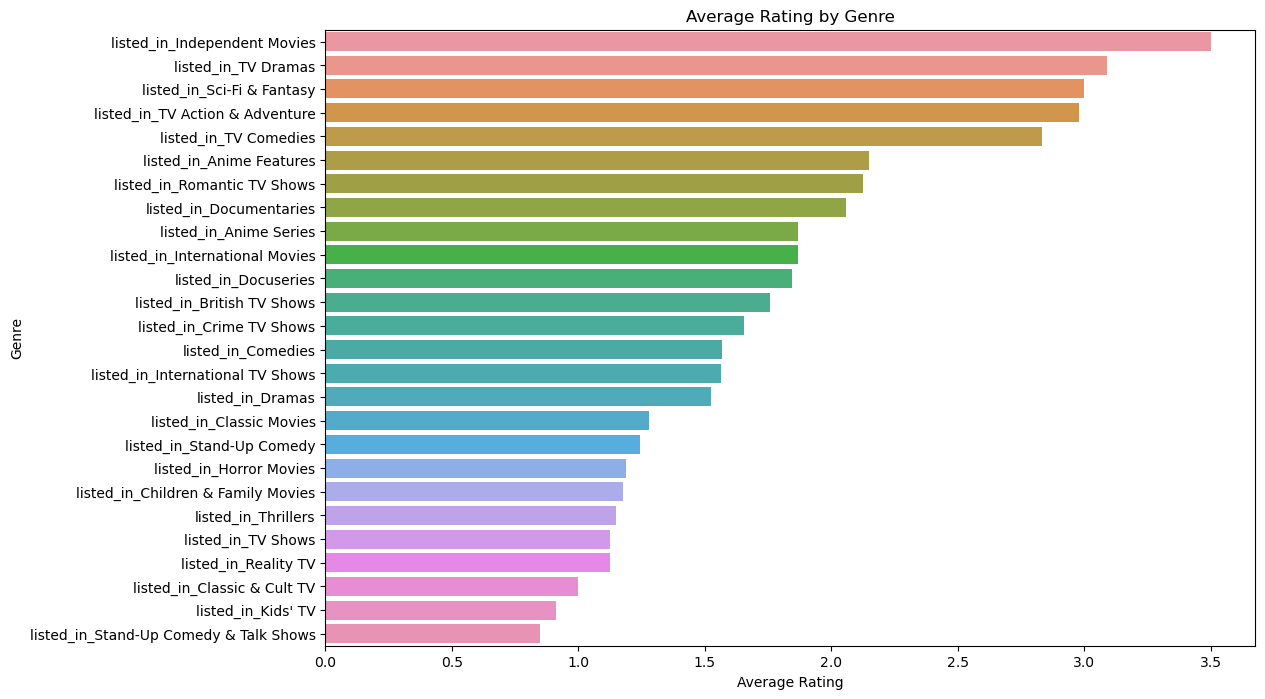

In [27]:
#gemiddelde rating per genre visualtieseren
genre_columns = [col for col in df_ml.columns if 'listed_in_' in col]
genre_ratings = df_ml[genre_columns + ['average_rating']].melt(id_vars='average_rating', var_name='Genre', value_name='Value')
genre_ratings = genre_ratings[genre_ratings['Value'] == 1].groupby('Genre')['average_rating'].mean().reset_index()
genre_ratings = genre_ratings[genre_ratings['average_rating'] > 0].sort_values(by='average_rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='Genre', data=genre_ratings)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.show()


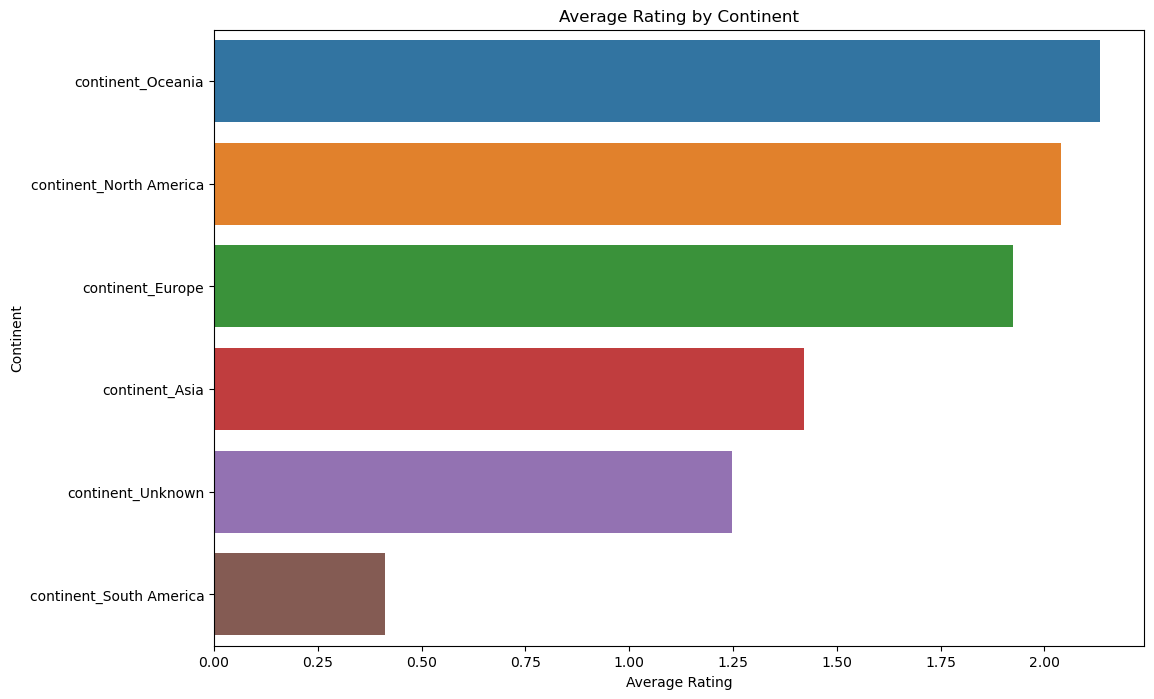

In [28]:
# ratings per continent visualiseren
continent_columns = [col for col in df_ml.columns if 'continent_' in col]
continent_ratings = df_ml[continent_columns + ['average_rating']].melt(id_vars='average_rating', var_name='Continent', value_name='Value')
continent_ratings = continent_ratings[continent_ratings['Value'] == 1].groupby('Continent')['average_rating'].mean().reset_index()
continent_ratings = continent_ratings[continent_ratings['average_rating'] > 0].sort_values(by='average_rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='Continent', data=continent_ratings)
plt.xlabel('Average Rating')
plt.ylabel('Continent')
plt.title('Average Rating by Continent')
plt.show()

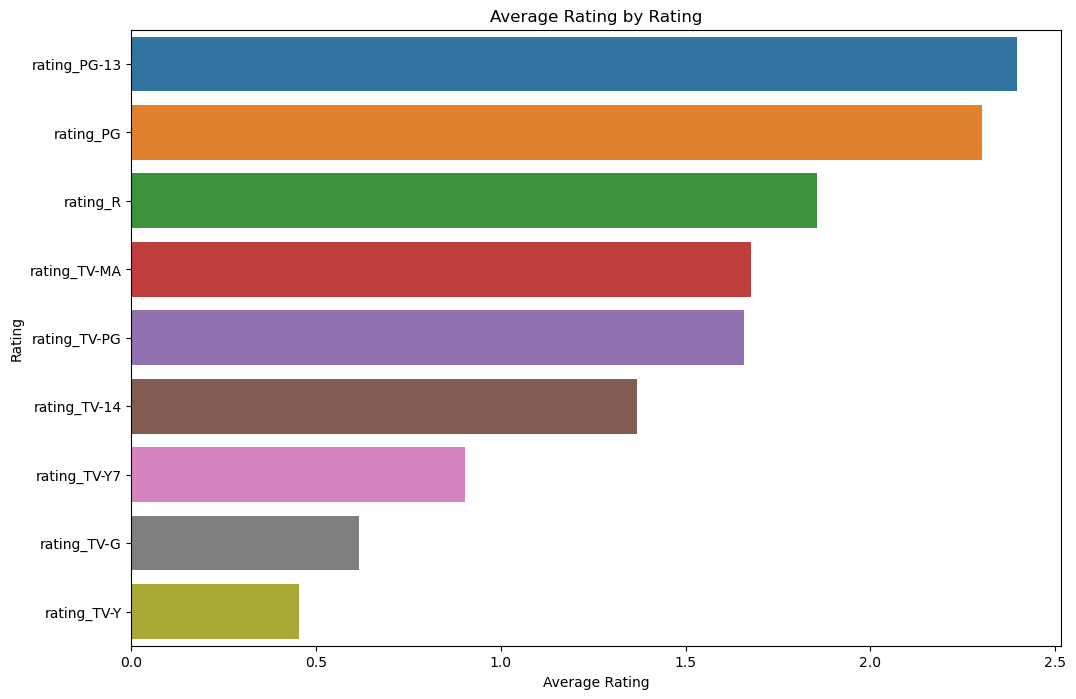

In [29]:
# ratings per rating visualiseren
rating_columns = [col for col in df_ml.columns if 'rating_' in col]
rating_ratings = df_ml[rating_columns + ['average_rating']].melt(id_vars='average_rating', var_name='Rating', value_name='Value')
rating_ratings = rating_ratings[rating_ratings['Value'] == 1].groupby('Rating')['average_rating'].mean().reset_index()
rating_ratings = rating_ratings[rating_ratings['average_rating'] > 0].sort_values(by='average_rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='Rating', data=rating_ratings)
plt.xlabel('Average Rating')
plt.ylabel('Rating')
plt.title('Average Rating by Rating')
plt.show()

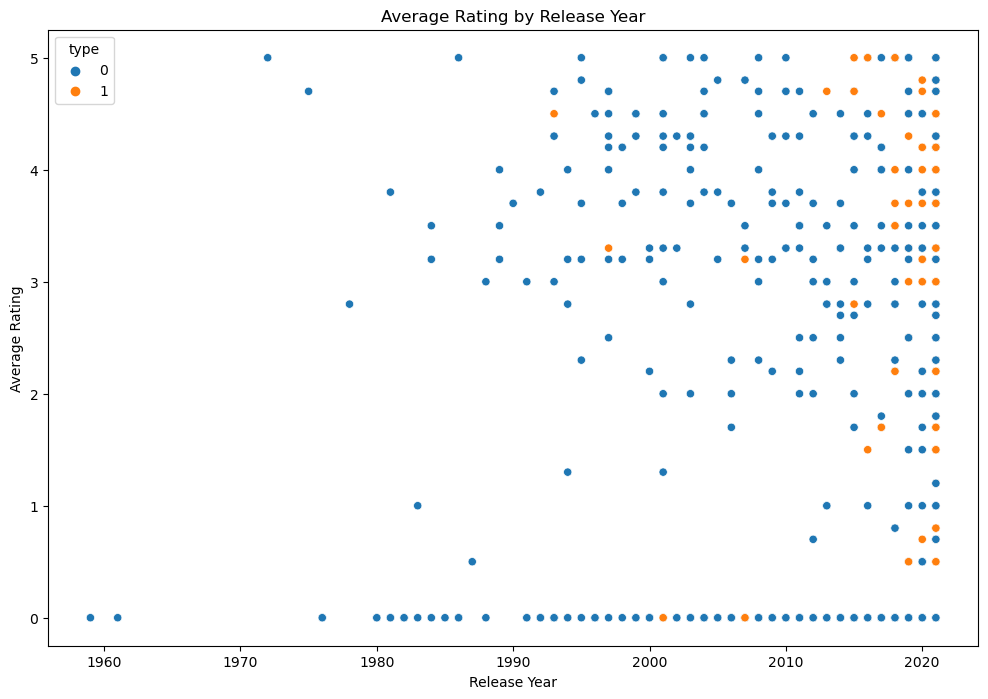

In [30]:
# ratings per release year visualiseren show en film onderscheiden
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='average_rating', data=df_ml, hue='type')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Release Year')
plt.show()




In [31]:
# ETL pipeline
class ETL:
    def __init__(self, netflix_file, api_key):
        self.netflix_file = netflix_file
        self.api_key = api_key
        self.base_url = "https://api.themoviedb.org/3"
        self.netflix_df = None
        self.all_reviews = {}
        self.all_reviews_sentiment = {}
        self.all_reviews_ratings = {}

    def extract_netflix_data(self):
        self.netflix_df = pd.read_csv(self.netflix_file)
        self.netflix_df = self.netflix_df.head(1000)
        self.netflix_df['title'] = self.netflix_df['title'].apply(self.clean_titles)
        self.netflix_df['url'] = self.netflix_df.apply(self.get_url, axis=1)

    def clean_titles(self, title):
        title = title.replace("&", "and").replace(":", "")
        title = title.lower().replace(" ", "_")
        return title

    def get_url(self, row):
        clean_title = self.clean_titles(row['title'])
        if row['type'] == 'Movie':
            return f"m/{clean_title}"
        elif row['type'] == 'TV Show':
            if "Season" in row["duration"]:
                season_number = int(row["duration"].split(" ")[0])
                season_formatted = f"/s{season_number:02}"
                return f"/tv/{clean_title}{season_formatted}"

    def scrape_reviews(self):
        for title in self.netflix_df['url']:
            url = f"https://www.rottentomatoes.com/{title}/reviews?type=user"
            try:
                response = requests.get(url)
                time.sleep(0.5)
                if response.status_code == 200:
                    soup = BeautifulSoup(response.content, 'html.parser')
                    reviews = soup.find_all('p', class_='audience-reviews__review js-review-text')
                    stars = soup.find_all('rating-stars-group')
                    title_reviews = []
                    title_ratings = []
                    for index, review in enumerate(reviews[:3], start=1):
                        title_reviews.append(review.get_text(strip=True))
                        if index - 1 < len(stars):
                            star_score = stars[index - 1].get('score', 'N/A')
                            title_ratings.append(float(star_score))
                        else:
                            title_ratings.append("N/A")
                    self.all_reviews[title] = {
                        "reviews": title_reviews,
                        "ratings": title_ratings,
                    }
                else:
                    self.all_reviews[title] = {
                        "reviews": ["Error: Failed to load the page."],
                        "ratings": [],
                    }
            except Exception as e:
                self.all_reviews[title] = {
                    "reviews": ["Error: An exception occurred."],
                    "ratings": [],
                }

    def preprocess_reviews(self):
        for title, data in self.all_reviews.items():
            reviews = data["reviews"]
            preprocessed_reviews = [self.preprocess_text(review) for review in reviews]
            if preprocessed_reviews:
                average_sentiment_review = self.average_sentiment(preprocessed_reviews)
            else:
                average_sentiment_review = "No reviews"
            self.all_reviews_sentiment[title] = average_sentiment_review

    def preprocess_text(self, text):
        tokens = self.tokenize_text(text)
        filtered_tokens = self.remove_stop_words(tokens)
        lemmatized_tokens = self.lemmatize_tokens(filtered_tokens)
        preprocessed_text = ' '.join(lemmatized_tokens)
        return preprocessed_text

    def tokenize_text(self, text):
        tokens = word_tokenize(text)
        return tokens

    def remove_stop_words(self, tokens):
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
        return filtered_tokens

    def lemmatize_tokens(self, tokens):
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return lemmatized_tokens

    def analyze_sentiment(self, text):
        sia = SentimentIntensityAnalyzer()
        sentiment_scores = sia.polarity_scores(text)
        sentiment = sentiment_scores['compound']
        return sentiment

    def average_sentiment(self, corpus):
        sentiments = [self.analyze_sentiment(text) for text in corpus]
        average_sentiment = sum(sentiments) / len(sentiments)
        if average_sentiment >= 0.05:
            average_sentiment = "Positive sentiment"
        elif average_sentiment <= -0.05:
            average_sentiment = "Negative sentiment"
        else:
            average_sentiment = "Neutral sentiment"
        return average_sentiment

    def calculate_average_ratings(self):
        for title, data in self.all_reviews.items():
            ratings = data["ratings"]
            average_rating = np.mean([rating for rating in ratings if rating != "N/A"])
            self.all_reviews_ratings[title] = average_rating

    def get_netflix_shows(self):
        url = f"{self.base_url}/discover/tv"
        netflix_shows = []
        page = 1
        while True:
            params = {
                "api_key": self.api_key,
                "with_networks": 213,
                "page": page
            }
            response = requests.get(url, params=params)
            data = response.json()
            netflix_shows.extend(data['results'])
            if page >= data['total_pages']:
                break
            page += 1
        return netflix_shows

    def get_show_data(self, series_id, new_data):
        url = f"{self.base_url}/tv/{series_id}"
        params = {"api_key": self.api_key}
        response = requests.get(url, params=params)
        try:
            return response.json().get(new_data)
        except:
            raise ValueError(f"{new_data} komt niet voor in de api, check voor mogelijke opties op: https://developer.themoviedb.org/reference/tv-series-details")

    def get_season_data(self, series_id, season_number, new_data):
        url = f"{self.base_url}/tv/{series_id}/season/{season_number}"
        params = {"api_key": self.api_key}
        response = requests.get(url, params=params)
        try:
            return response.json().get(new_data)
        except:
            raise ValueError(f"{new_data} komt niet voor in de api, check voor mogelijke opties op: https://developer.themoviedb.org/reference/tv-seasons")

    def transform_data(self):
        self.netflix_df['average_sentiment'] = self.netflix_df['url'].map(self.all_reviews_sentiment)
        self.netflix_df['average_rating'] = self.netflix_df['url'].map(self.all_reviews_ratings)
        self.netflix_df['average_rating'] = self.netflix_df['average_rating'].fillna(0)
        self.netflix_df['average_rating'] = self.netflix_df['average_rating'].round(2)
        netflix_shows = self.get_netflix_shows()
        api_df = pd.DataFrame(netflix_shows, columns=['name', 'id', 'number_of_seasons', 'status', 'vote_average']).rename(columns={'vote_average': 'average_series_rating'})
        api_df['status'] = api_df['id'].apply(self.get_show_data, new_data='status')
        api_df['number_of_seasons'] = api_df['id'].apply(self.get_show_data, new_data='number_of_seasons')
        api_df['final_season_rating'] = api_df.apply(lambda x: self.get_season_data(x.id, x.number_of_seasons, new_data='vote_average'), axis=1)
        api_df.loc[api_df['number_of_seasons'] == 1, 'final_season_rating'] = api_df['average_series_rating']
        api_df.loc[(api_df['status'] == 'Returning Series') & (api_df['final_season_rating'] == 0.0), 'final_season_rating'] = api_df.apply(lambda x: self.get_season_data(x.id, x.number_of_seasons - 1, new_data='vote_average'), axis=1)
        api_df = api_df.round(1)
        self.netflix_df['title'] = self.netflix_df['title'].str.lower().str.replace(' ', '_')
        api_df['name'] = api_df['name'].str.lower().str.replace(' ', '_')
        api_df = api_df.drop_duplicates(subset='name')
        self.netflix_df['status'] = self.netflix_df['title'].map(api_df.set_index('name')['status'])
        self.netflix_df.set_index('title', inplace=True)
        df_ml = self.netflix_df.copy()
        df_ml['type'] = df_ml['type'].map({'Movie': 0, 'TV Show': 1})
        df_ml['average_sentiment'] = df_ml['average_sentiment'].map({'Positive sentiment': 3, 'Neutral sentiment': 2, 'Negative sentiment': 1, 'No reviews': 0})
        df_ml['average_rating'] = df_ml['average_rating'].apply(lambda x: round(x, 1))
        df_ml = df_ml.drop(columns=['show_id', 'director', 'cast', 'date_added', 'description', 'url'])
        df_ml['film_duration'] = df_ml['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else 0)
        df_ml['seasons'] = df_ml['duration'].apply(lambda x: int(x.split(' ')[0]) if 'Season' in x else 0)
        df_ml = df_ml.drop(columns=['duration'])
        df_ml['country'] = df_ml['country'].fillna('')
        df_ml['country'] = df_ml['country'].apply(lambda x: x.split(",")[0])
        df_ml['country'] = df_ml['country'].apply(lambda x: x.strip())
        df_ml['continent'] = df_ml['country'].map({'United States': 'North America', 'India': 'Asia', 'United Kingdom': 'Europe', 'South Korea': 'Asia', 'Spain': 'Europe', 'Canada': 'North America', 'Japan': 'Asia', 'France': 'Europe', 'Turkey': 'Asia', 'Australia': 'Oceania', 'Mexico': 'North America', 'Taiwan': 'Asia', 'Brazil': 'South America', 'Philippines': 'Asia', 'Indonesia': 'Asia', 'Nigeria': 'Africa', 'Germany': 'Europe', 'China': 'Asia', 'Italy': 'Europe', 'Argentina': 'South America', 'Colombia': 'South America', 'Denmark': 'Europe', 'Norway': 'Europe', 'Pakistan': 'Asia', 'Thailand': 'Asia', 'Hong Kong': 'Asia', 'Ireland': 'Europe', 'Russia': 'Europe', 'Sweden': 'Europe', 'Singapore': 'Asia', 'South Africa': 'Africa', 'Malaysia': 'Asia', 'Netherlands': 'Europe', 'Belgium': 'Europe', 'New Zealand': 'Oceania'})
        df_ml['continent'] = df_ml['continent'].fillna('Unknown')
        df_ml = pd.get_dummies(df_ml, columns=['continent'], drop_first=True)
        df_ml = pd.get_dummies(df_ml, columns=['rating'], drop_first=True)
        df_ml['listed_in'] = df_ml['listed_in'].apply(lambda x: x.split(",")[0])
        df_ml['listed_in'] = df_ml['listed_in'].apply(lambda x: x.strip())
        df_ml = pd.get_dummies(df_ml, columns=['listed_in'], drop_first=True)
        df_ml['status'] = df_ml['status'].fillna('Unknown')
        df_ml = pd.get_dummies(df_ml, columns=['status'], drop_first=True)
        return df_ml

    def run(self):
        self.extract_netflix_data()
        self.scrape_reviews()
        self.preprocess_reviews()
        self.calculate_average_ratings()
        df_ml = self.transform_data()
        return df_ml

# Example usage
etl = ETL('netflix_titles.csv', '1d4b0a66740e090a9d5bedddcdeaa0e6')
df_ml = etl.run()
df_ml


    






DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:443 "GET /m/dick_johnson_is_dead/reviews?type=user HTTP/1.1" 200 36814
DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:443 "GET //tv/blood_and_water/s02/reviews?type=user HTTP/1.1" 200 27073
DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:443 "GET //tv/ganglands/s01/reviews?type=user HTTP/1.1" 200 26109
DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:443 "GET //tv/jailbirds_new_orleans/s01/reviews?type=user HTTP/1.1" 200 27851
DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:443 "GET //tv/kota_factory/s02/reviews?type=user HTTP/1.1" 200 26617
DEBUG: Starting new HTTPS connection (1): www.rottentomatoes.com:443
DEBUG: https://www.rottentomatoes.com:44

KeyboardInterrupt: 